# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

In [42]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.mlab as mlab
import numpy as np
from scipy import stats as st
from scipy.stats import norm
%matplotlib inline

In [20]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

### Is the distribution of body temperatures normal?

In [21]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [22]:
df.temperature.describe()

count    130.000000
mean      98.249231
std        0.733183
min       96.300000
25%       97.800000
50%       98.300000
75%       98.700000
max      100.800000
Name: temperature, dtype: float64

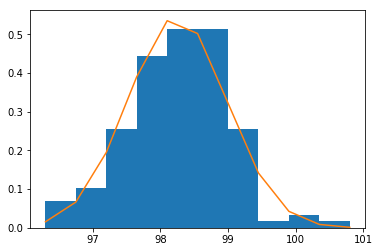

In [23]:
n, bins, patches = plt.hist(df.temperature, 10, normed=1)
mu = np.mean(df.temperature)
sigma = np.std(df.temperature)
plt.plot(bins, mlab.normpdf(bins, mu, sigma))

In [24]:
import scipy.stats as stats
x=df.temperature
stats.normaltest(x)

NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)

P-value = 0.26. The body temperature is normal distributed

### Is the sample size large? Are the observations independent?

Sample size: (n = 130) > 30
Sample size is large enough

Sample observations:
    Randomly selected
Sample observations are independent

### Is the true population mean reallly 98.6 degrees F?

One sample hypothesis test should be use because we only have one set of sample observations

Because we  don't know the population standard deviation, we can't use the z-test
Since the number of sample observations are over 30, t-test and z-test would give very similar result

In [64]:
mu = 98.6
print("mu = ", mu)
x = np.mean(df.temperature)
print("x = ", x)
s = np.std(df.temperature)
sigma = np.std(df.temperature)
print("sigma = ", sigma)
print('s = ', s)
n = 130
print("n = ", 130)
SE = sigma/(130**0.5)
print("SE = s/nsquareroot = ", SE)

#Using t-test
t = round(float((x-mu)/SE),3)
print("t = ", t)

mu =  98.6
x =  98.24923076923078
sigma =  0.7303577789050377
s =  0.7303577789050377
n =  130
SE = s/nsquareroot =  0.06405661469519336
t =  -5.476


In [65]:
#one-tailed
p_values = st.norm.sf(abs(t))*2
print("t-test:")
print("P_vales = ", p_values)

t-test:
P_vales =  4.35047686628e-08


Since p values is so small. We can reject the null hypothesis. This means the true population mean is likely to be different than 98.6

### At what temperature should we consider someone's temperature to be "abnormal"?

In [80]:
#Margin of error, at 95% confidence
E = 0.98/(n**0.5)
print("E = ", round(E,5))
print("Margin of error is approx. ", round(E*100,2), "%")

E =  0.08595
Margin of error is approx.  8.6 %


In [86]:
#Confident interval at 95%
max_CI=x+(mu*E)
min_CI=x-(mu*E)
print ("Max = ", max_CI)
print ("Min = ", min_CI)
print ("We should consider a temperature below ", round(min_CI,2), " or above ", round(max_CI,2), " to be abnormal")

Max =  106.72406699819074
Min =  89.77439454027082
We should consider a temperature below  89.77  or above  106.72  to be abnormal


### Is there a significant different between males and females in normal temperature?

I would use two sample hypothesis testing because I need to compare between two samples of populations

In [88]:
F=df[df.gender=='F']
M=df[df.gender=='M']

In [89]:
M.temperature.describe()

count    65.000000
mean     98.104615
std       0.698756
min      96.300000
25%      97.600000
50%      98.100000
75%      98.600000
max      99.500000
Name: temperature, dtype: float64

In [90]:
F.temperature.describe()

count     65.000000
mean      98.393846
std        0.743488
min       96.400000
25%       98.000000
50%       98.400000
75%       98.800000
max      100.800000
Name: temperature, dtype: float64

In [91]:
s_M=0.698756
s_F=0.743488
n=65 # n_M = n_F
x_M=98.104615
x_F=98.393846

SE_FM= round((((s_M**2)+(s_F**2))/n)**0.5,2)
#SE
x_diff=round(x_M-x_F,2)
#x_diff

Z= round(((x_diff - 0)/SE_FM),2)
#Z

CI_min= round(x_diff+(Z*SE_FM),2)
CI_max= round(x_diff-(Z*SE_FM),2)
#print CI_max,CI_min

In [99]:
#two tailes
p_values = st.norm.sf(abs(Z))*2
print ("p values = ",p_values)
print( "P values is ", round(p_values *100,2),"%", "so there is a significant different between males and females in normal temperature")

p values =  0.0257474428772
P values is  2.57 % so there is a significant different between males and females in normal temperature
